In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data:

In [2]:
df = pd.read_csv("salary_data_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_location,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_location', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel'],
      dtype='object')

### Simplifie Job Title:

In [5]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
    
    
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or 'lead' in title.lower() or "principal" in title.lower():
        return 'senior'
    elif "jr" in title.lower() or "jr." in title.lower():
        return "jenior"
    else:
        return "na"
        
        

In [6]:
df["job_simp"] = df["Job Title"].apply(title_simplifier)

In [7]:
df["job_simp"].value_counts() 

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [8]:
df["seniority"] = df["Job Title"].apply(seniority)

In [9]:
df["seniority"].value_counts()

na        520
senior    220
jenior      2
Name: seniority, dtype: int64

### Fix State Los Angelos:

In [10]:
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 IN              10
 WI              10
 UT              10
 AZ               9
 MO               9
 AL               8
 DE               6
 KY               6
 GA               6
 MI               6
 CT               5
 IA               5
 NE               4
 LA               4
 OR               4
 KS               3
 NM               3
 ID               2
 MN               2
 RI               1
 Los Angeles      1
 SC               1
Name: job_state, dtype: int64

In [11]:
df["job_state"] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != "los angeles" else "CA")
df.job_state.value_counts()
#df.head()
#df.drop("job state", inplace=True, axis=1)

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
IN     10
UT     10
AZ      9
MO      9
AL      8
GA      6
KY      6
MI      6
DE      6
CT      5
IA      5
OR      4
NE      4
LA      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

### Job Description Lenght:

In [12]:
df["descr_len"] = df["Job Description"].apply(lambda x: len(x))
df["descr_len"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: descr_len, Length: 742, dtype: int64

### Competitor Counts:

In [13]:
df.Competitors

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [14]:
df["num_comp"] = df["Competitors"].apply(lambda x: len(x.split(',')) if x != "-1" else 0)
df["num_comp"]

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

### Hourly Wage To Annual:

In [15]:
df["min_salary"] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [16]:
df["max_salary"] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [17]:
df[df.hourly==1][["hourly","min_salary", "max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [18]:
df["min_salary"].min(),df["min_salary"].max()

(15, 202)

In [19]:
df["max_salary"].min(),df["max_salary"].max()

(16, 306)

In [20]:
df["company_txt"] = df.company_txt.apply(lambda x : x.replace('\n', ''))

In [21]:
df["company_txt"]

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [22]:
df.describe()

,Rating,Founded,hourly,employer provided salary,min_salary,max_salary,avg_salary,same_location,age,python_yn,R_yn,spark,aws,excel,descr_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

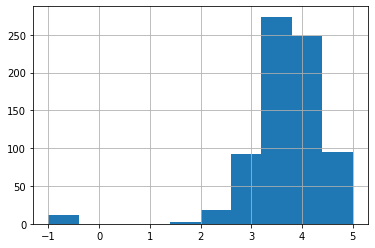

In [23]:
df.Rating.hist()

<AxesSubplot:>

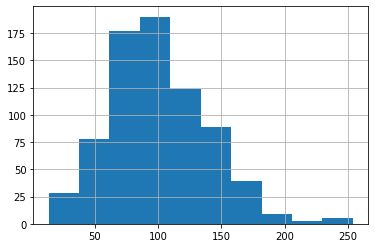

In [24]:
df.avg_salary.hist()

<AxesSubplot:>

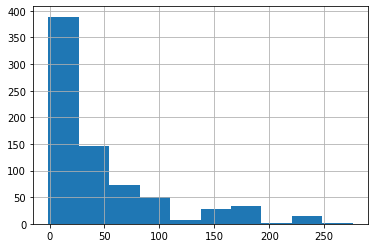

In [25]:
df.age.hist()
# Exponentiel Distribution we must normalize it if we apply REGRESSION MODEL

<AxesSubplot:>

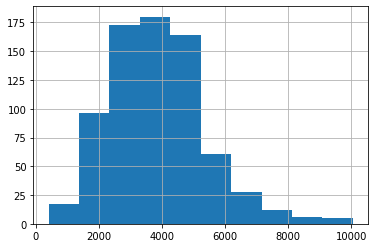

In [26]:
df.descr_len.hist()

<AxesSubplot:>

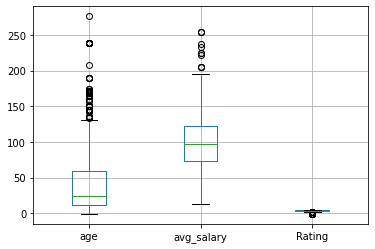

In [27]:
df.boxplot(column=['age','avg_salary','Rating'])

<AxesSubplot:>

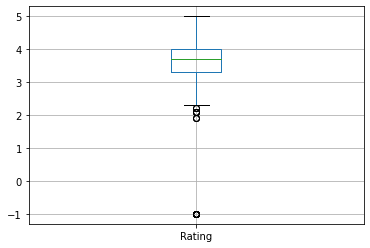

In [28]:
df.boxplot(column=['Rating'])

In [29]:
df[["age","avg_salary","Rating","descr_len"]].corr()

,age,avg_salary,Rating,descr_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
descr_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot:>

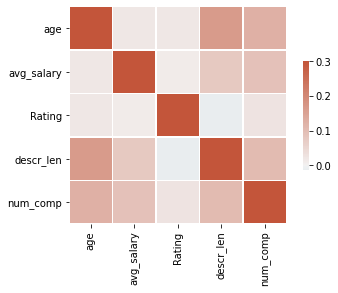

In [30]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[["age","avg_salary","Rating","descr_len","num_comp"]].corr(), cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_location', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'descr_len', 'num_comp'],
      dtype='object')

In [32]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_location', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority']]

In [33]:
df_cat.head()

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,company_txt,job_state,same_location,python_yn,R_yn,spark,aws,excel,job_simp,seniority
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Tecolote Research,NM,0,1,0,0,0,1,data scientist,na
1,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),University of Maryland Medical System,MD,0,1,0,0,0,0,data scientist,na
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),KnowBe4,FL,1,1,0,1,0,1,data scientist,na
3,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),PNNL,WA,1,1,0,0,0,0,data scientist,na
4,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Affinity Solutions,NY,1,1,0,0,0,1,data scientist,na


Graph For Location: Total =200


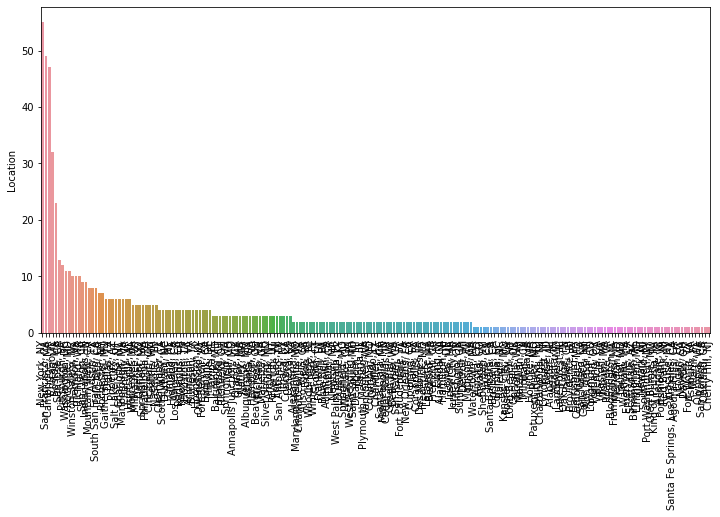

Graph For Headquarters: Total =198


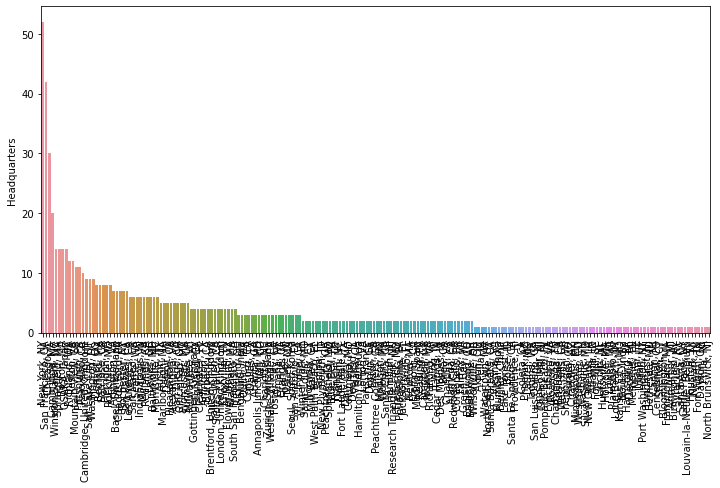

Graph For Size: Total =9


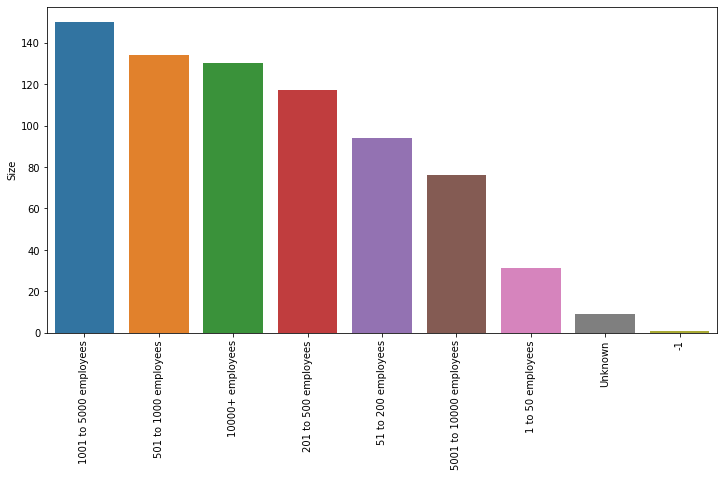

Graph For Type of ownership: Total =11


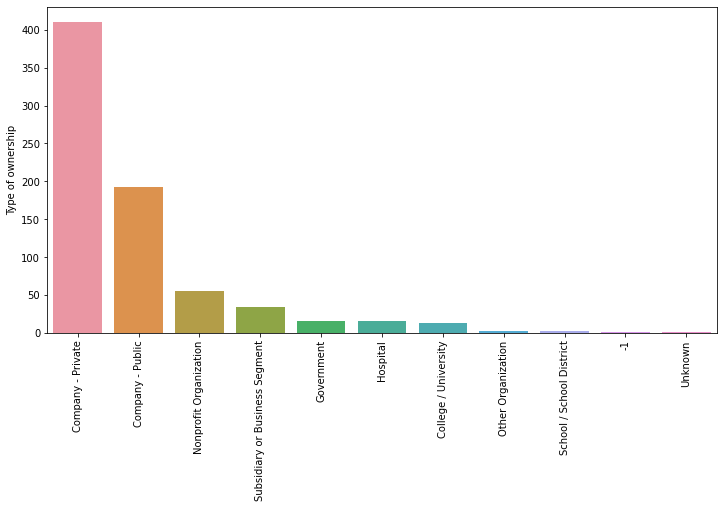

Graph For Industry: Total =60


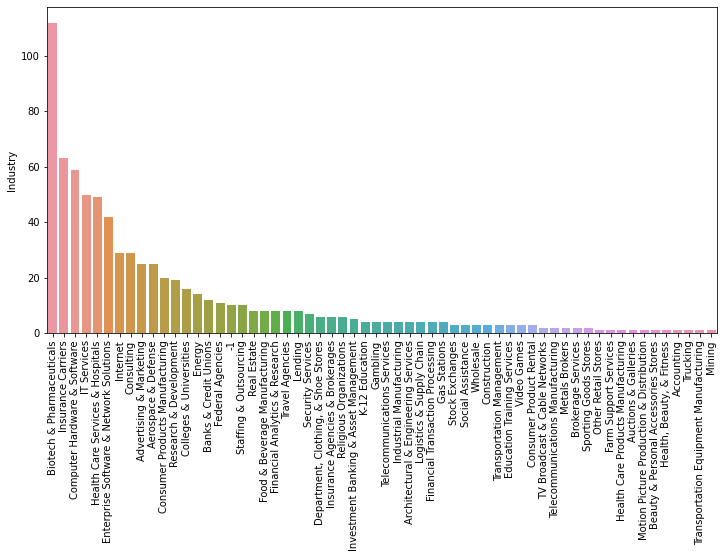

Graph For Sector: Total =25


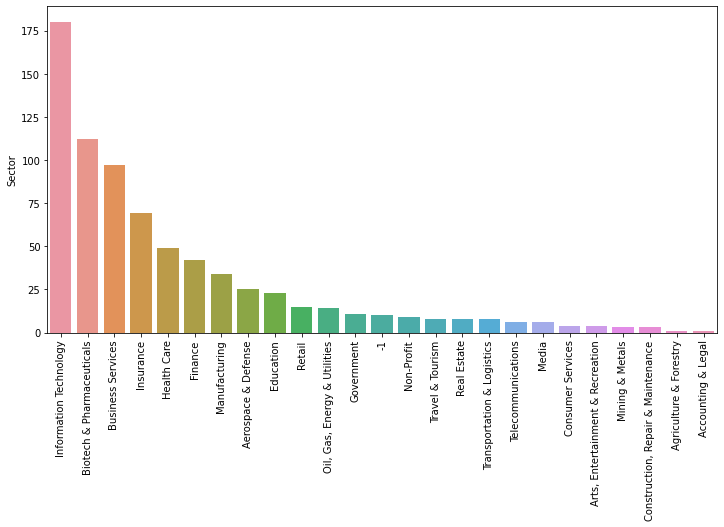

Graph For Revenue: Total =14


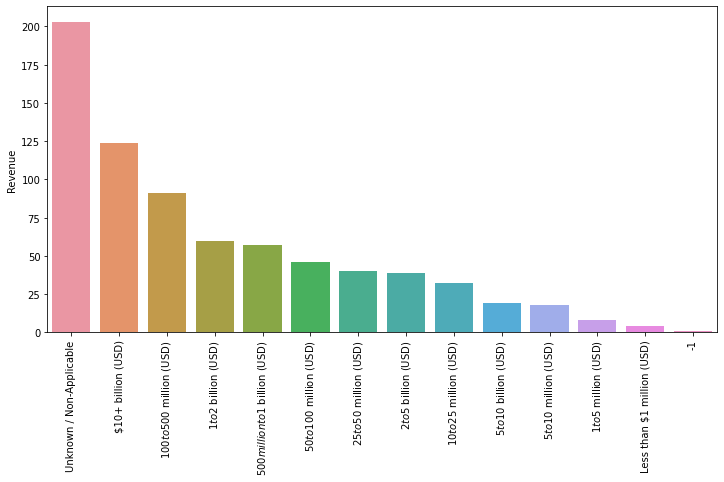

Graph For company_txt: Total =343


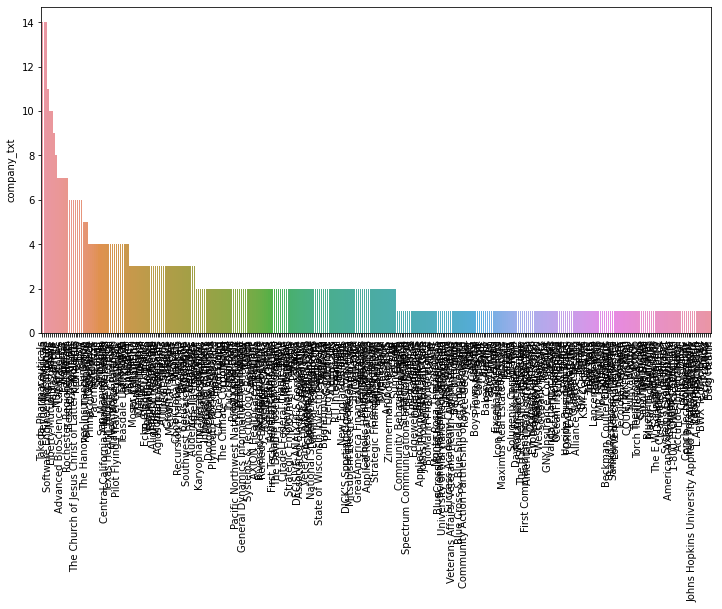

Graph For job_state: Total =37


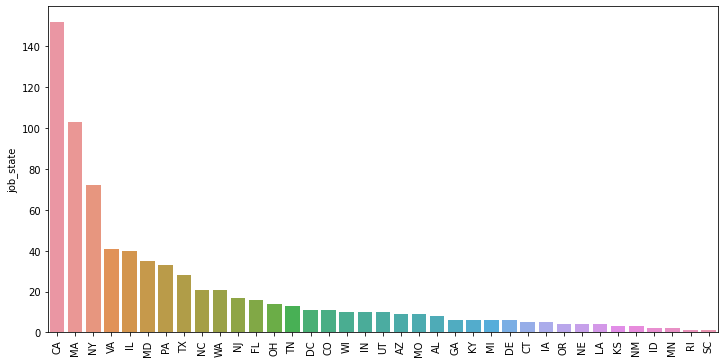

Graph For same_location: Total =2


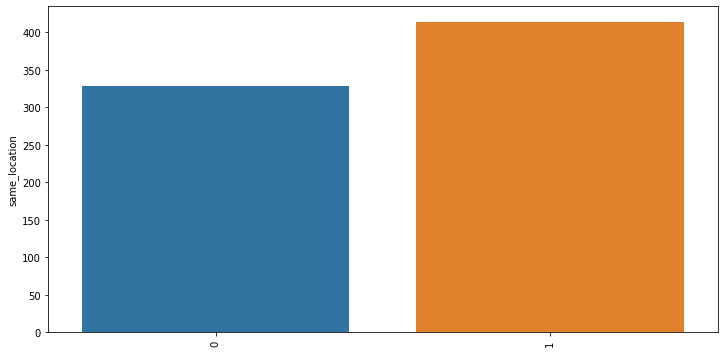

Graph For python_yn: Total =2


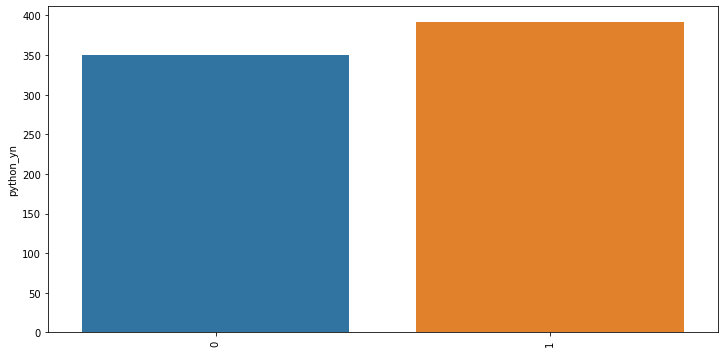

Graph For R_yn: Total =2


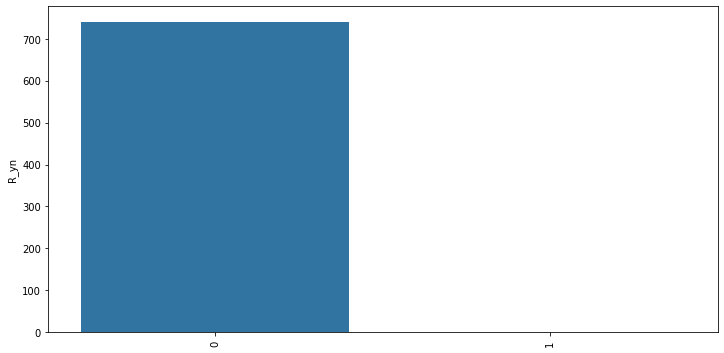

Graph For spark: Total =2


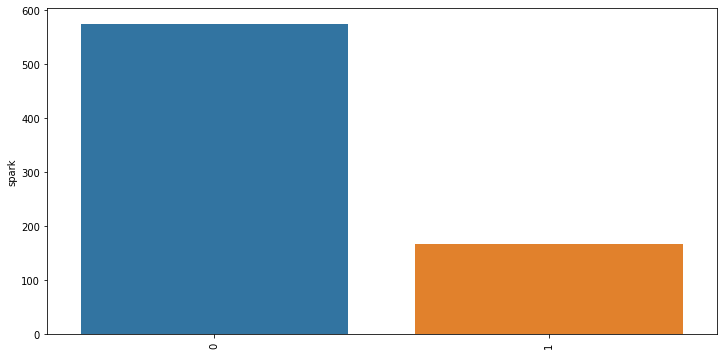

Graph For aws: Total =2


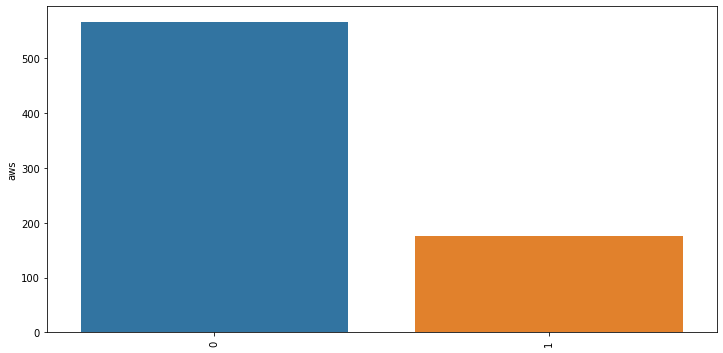

Graph For excel: Total =2


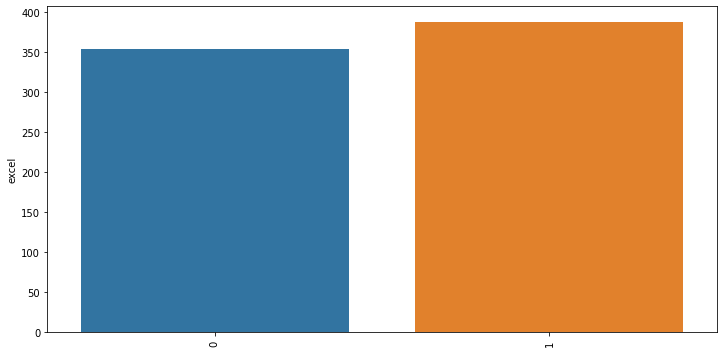

Graph For job_simp: Total =7


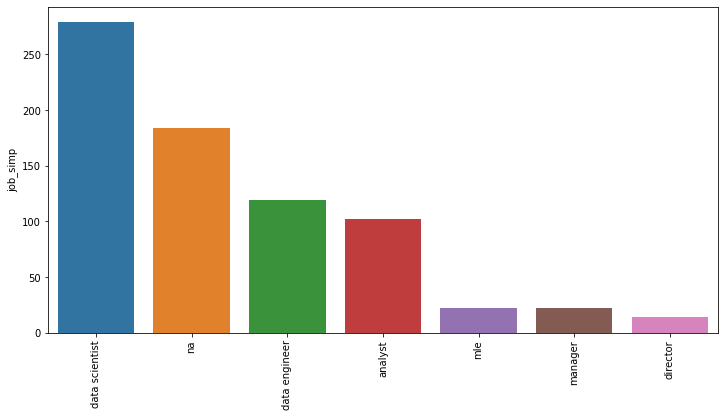

Graph For seniority: Total =3


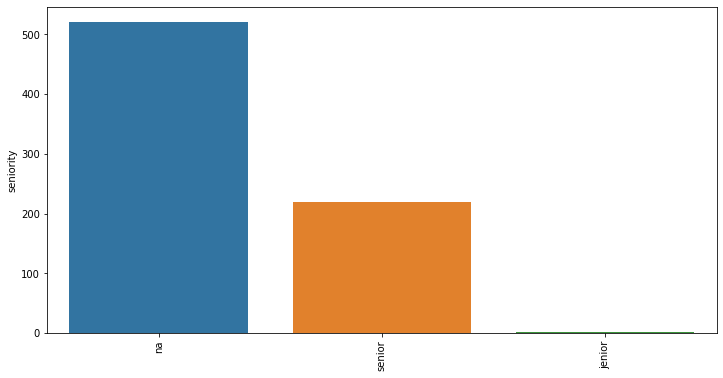

In [34]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph For %s: Total =%d" % (i, len(cat_num)))
    fig = plt.figure(figsize=(12,6))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    

Graph For Location: Total =20


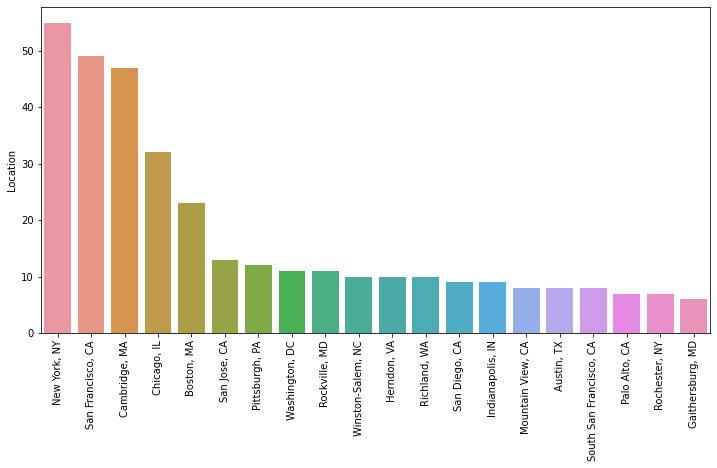

Graph For Headquarters: Total =20


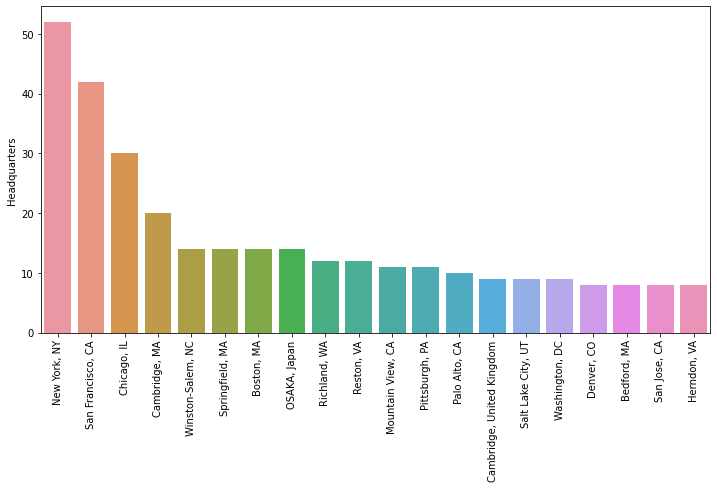

Graph For company_txt: Total =20


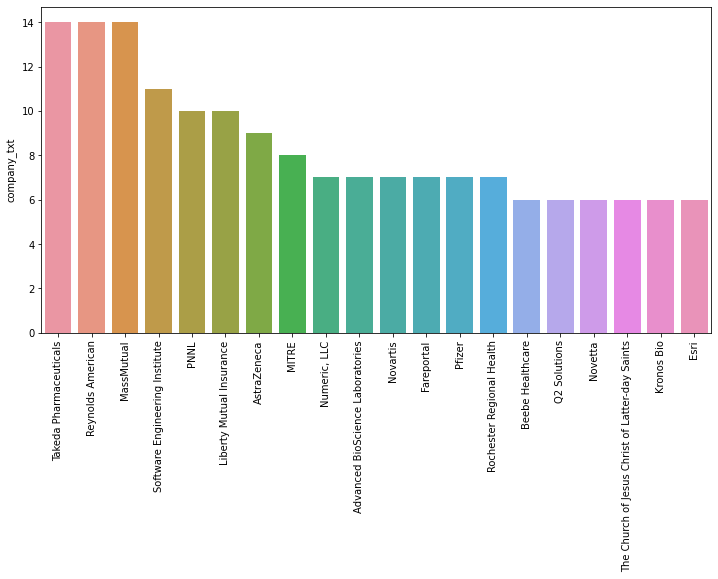

In [35]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_cat[i].value_counts()[0:20]
    print("Graph For %s: Total =%d" % (i, len(cat_num)))
    fig = plt.figure(figsize=(12,6))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [36]:
pd.pivot_table(df, index ='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [37]:
pd.pivot_table(df, index =['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jenior      56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jenior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [38]:
pd.pivot_table(df, index ='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [39]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [40]:
pd.pivot_table(df, index =['job_state','job_simp'], values='avg_salary').sort_values('avg_salary', ascending=False)

,,avg_salary
job_state,job_simp,
IL,director,221.750000
CA,mle,177.300000
NJ,director,161.500000
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
IL,mle,133.000000
CA,data engineer,129.540000
MO,data scientist,127.666667


In [41]:
pd.pivot_table(df, index =['job_state','job_simp'], values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False)

avg_salary
job_state job_simp                  
CA        data scientist          68
MA        na                      46
NY        data scientist          40
MA        data scientist          30
CA        na                      27
          data engineer           25
VA        data scientist          18
CA        analyst                 18
WA        data scientist          17
MD        na                      16
IL        data scientist          15
NY        analyst                 14
MD        data scientist          13
TX        data scientist          13
NC        na                      12
MA        data engineer           12
NY        na                      12
VA        data engineer           10
TN        data engineer           10
CA        manager                  9
IL        data engineer            8
TX        data engineer            8
PA        na                       8
          analyst                  8
          mle                      7
TX        na                       7
FL        data scientist           7
OH        data scientist           7
NC        data engineer            6
MA        director                 6
IL        na                       6
          director                 6
NJ        analyst                  6
FL        analyst                  6
DE        na                       6
PA        data scientist           6
VA        analyst                  6
DC        data scientist           5
CA        mle                      5
AZ        data engineer            5
MA        manager                  5
VA        na                       5
AL        analyst                  5
NY        data engineer            4
OH        analyst                  4
NJ        data scientist           4
NE        na                       4
UT        analyst                  4
MI        data scientist           4
MA        analyst                  4
KY        na                       4
DC        data engineer            4
IN        data engineer            4
          na                       4
WI        na                       4
MD        data engineer            3
NM        data scientist           3
IA        data engineer            3
GA        data scientist           3
OH        na                       3
OR        data scientist           3
FL        data engineer            3
PA        manager                  3
CT        na                       3
CO        na                       3
          data scientist           3
          data engineer            3
UT        data engineer            3
          data scientist           3
WA        analyst                  3
WI        analyst                  3
          data scientist           3
IL        analyst                  3
GA        na                       3
MD        analyst                  3
MO        data scientist           3
          na                       3
KS        mle                      3
NC        data scientist           3
TN        analyst                  2
MO        analyst                  2
VA        mle                      2
CT        data scientist           2
NJ        manager                  2
AL        na                       2
DC        analyst                  2
LA        data engineer            2
IN        data scientist           2
KY        data scientist           2
MI        manager                  2
NJ        data engineer            2
IA        analyst                  2
NY        mle                      2
IL        mle                      2
ID        analyst                  2
NJ        director                 2
AZ        na                       2
WA        na                       1
CO        analyst                  1
MN        analyst                  1
AL        data engineer            1
AZ        analyst                  1
          data scientist           1
NJ        na                       1
MN        data engineer            1
MO        manager                  1
CO        mle                 

In [42]:
pd.pivot_table(df[df.job_simp=="data scientist"], index ='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer provided salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_location', 'age',
       'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp', 'seniority',
       'descr_len', 'num_comp'],
      dtype='object')

In [44]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer provided salary', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership', 'avg_salary']]

In [45]:
df_pivots.head()

,Rating,Industry,Sector,Revenue,num_comp,hourly,employer provided salary,python_yn,R_yn,spark,aws,excel,Type of ownership,avg_salary
0,3.8,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,0,1,0,0,0,1,Company - Private,72.0
1,3.4,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,0,1,0,0,0,0,Other Organization,87.5
2,4.8,Security Services,Business Services,$100 to $500 million (USD),0,0,0,1,0,1,0,1,Company - Private,85.0
3,3.8,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,0,0,1,0,0,0,0,Government,76.5
4,2.9,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,0,0,1,0,0,0,1,Company - Private,114.5


In [46]:
for i in df_pivots.columns:
    print("\n",i)
    print(pd.pivot_table(df_pivots, index=i, values="avg_salary").sort_values("avg_salary", ascending=False))


 Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286

 Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services        

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [47]:
pd.pivot_table(df_pivots, index="Revenue", columns="python_yn", values="avg_salary", aggfunc="count")

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [55]:
!pip install wordcloud

In [57]:
!pip install nltk

In [58]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

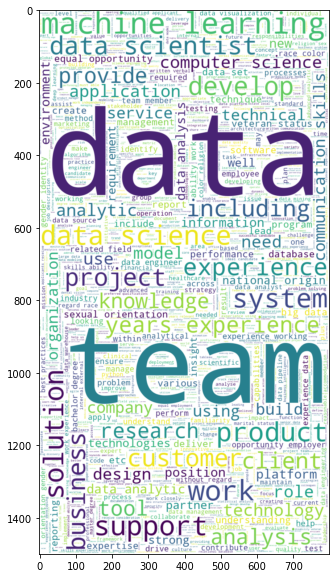

In [59]:
words = " ".join(df["Job Description"])

def punctuation_stop(text):
    """Remove punctuation and stop words"""
    filtred = []
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtred.append(w.lower())
    return filtred

words_filtred = punctuation_stop(words)

text = " ".join([ele for ele in words_filtred])
wc = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.show()
        